# Lesson 8: Object Detection

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


**Note:**  `py-espeak-ng` is only available Linux operating systems.

To run locally in a Linux machine, follow these commands:
```
    sudo apt-get update
    sudo apt-get install espeak-ng
    pip install py-espeak-ng
```

In [2]:
!pip install py-espeak-ng


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Build the `object-detection` pipeline using 🤗 Transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [3]:
from helper import load_image_from_url, render_results_in_image

In [4]:
from transformers import pipeline

- Here is some code that suppresses warning messages.

In [5]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

In [6]:
import torch
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50",
                       device=0 if torch.cuda.is_available() else -1) # Use GPU if available, if not, use CPU

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

Explore more of the [Hugging Face Hub for more object detection models](https://huggingface.co/models?pipeline_tag=object-detection&sort=trending)

### Use the Pipeline

In [7]:
from PIL import Image

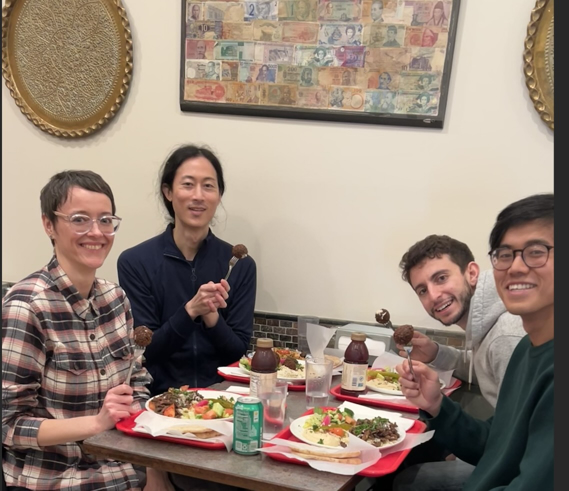

In [8]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((569, 491))

In [9]:
pipeline_output = od_pipe(raw_image)

In [10]:
pipeline_output

[{'score': 0.6360049843788147,
  'label': 'bowl',
  'box': {'xmin': 145, 'ymin': 390, 'xmax': 245, 'ymax': 422}},
 {'score': 0.5226842761039734,
  'label': 'chair',
  'box': {'xmin': 303, 'ymin': 322, 'xmax': 341, 'ymax': 358}},
 {'score': 0.5195297598838806,
  'label': 'broccoli',
  'box': {'xmin': 170, 'ymin': 392, 'xmax': 196, 'ymax': 408}},
 {'score': 0.9966315627098083,
  'label': 'person',
  'box': {'xmin': 386, 'ymin': 194, 'xmax': 560, 'ymax': 488}},
 {'score': 0.9765510559082031,
  'label': 'fork',
  'box': {'xmin': 403, 'ymin': 344, 'xmax': 416, 'ymax': 385}},
 {'score': 0.9886925220489502,
  'label': 'bottle',
  'box': {'xmin': 343, 'ymin': 333, 'xmax': 370, 'ymax': 394}},
 {'score': 0.9934350252151489,
  'label': 'cup',
  'box': {'xmin': 259, 'ymin': 385, 'xmax': 287, 'ymax': 431}},
 {'score': 0.9992789626121521,
  'label': 'person',
  'box': {'xmin': 115, 'ymin': 142, 'xmax': 254, 'ymax': 392}},
 {'score': 0.8537569642066956,
  'label': 'fork',
  'box': {'xmin': 220, 'ymin

- Return the results from the pipeline using the helper function `render_results_in_image`.

In [11]:
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

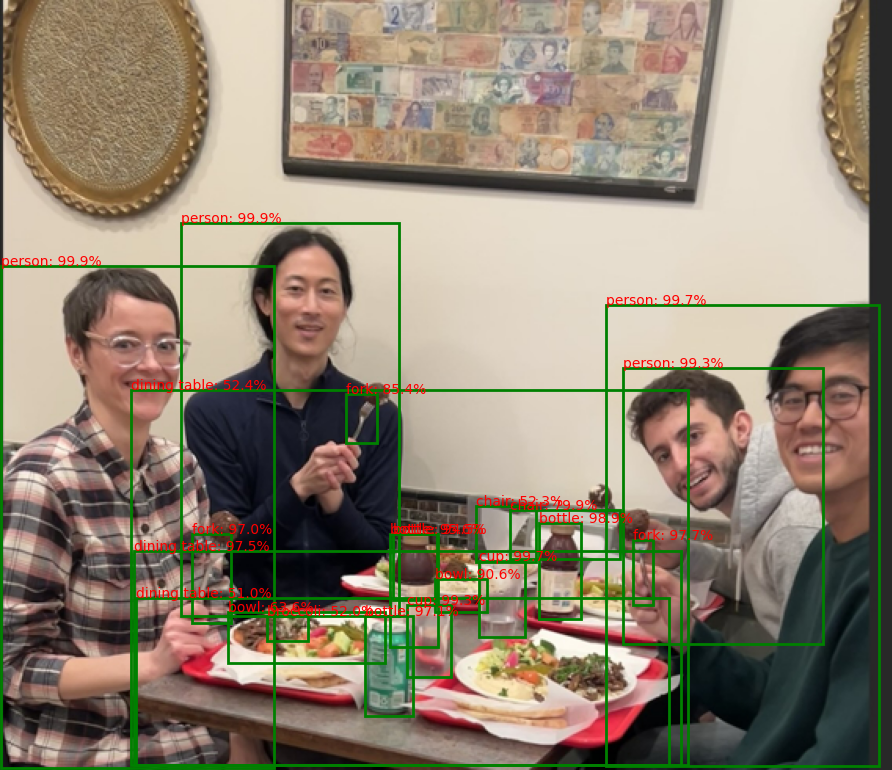

In [12]:
processed_image

### Using `Gradio` as a Simple Interface

- Use [Gradio](https://www.gradio.app) to create a demo for the object detection app.
- The demo makes it look friendly and easy to use.
- You can share the demo with your friends and colleagues as well.

In [13]:
import os
import gradio as gr

In [14]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    
    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [15]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

- `share=True` will provide an online link to access to the demo

In [16]:
demo.launch(share=True, server_port=12345)

Running on local URL:  http://127.0.0.1:12345
Running on public URL: https://6da069f7e64ed433a7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [17]:
demo.close()

Closing server running on port: 12345


### Close the app
- Remember to call `.close()` on the Gradio app when you're done using it.

### Make an AI Powered Audio Assistant

- Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

- Inspect the output of the object detection pipeline.

In [18]:
pipeline_output

[{'score': 0.6360049843788147,
  'label': 'bowl',
  'box': {'xmin': 145, 'ymin': 390, 'xmax': 245, 'ymax': 422}},
 {'score': 0.5226842761039734,
  'label': 'chair',
  'box': {'xmin': 303, 'ymin': 322, 'xmax': 341, 'ymax': 358}},
 {'score': 0.5195297598838806,
  'label': 'broccoli',
  'box': {'xmin': 170, 'ymin': 392, 'xmax': 196, 'ymax': 408}},
 {'score': 0.9966315627098083,
  'label': 'person',
  'box': {'xmin': 386, 'ymin': 194, 'xmax': 560, 'ymax': 488}},
 {'score': 0.9765510559082031,
  'label': 'fork',
  'box': {'xmin': 403, 'ymin': 344, 'xmax': 416, 'ymax': 385}},
 {'score': 0.9886925220489502,
  'label': 'bottle',
  'box': {'xmin': 343, 'ymin': 333, 'xmax': 370, 'ymax': 394}},
 {'score': 0.9934350252151489,
  'label': 'cup',
  'box': {'xmin': 259, 'ymin': 385, 'xmax': 287, 'ymax': 431}},
 {'score': 0.9992789626121521,
  'label': 'person',
  'box': {'xmin': 115, 'ymin': 142, 'xmax': 254, 'ymax': 392}},
 {'score': 0.8537569642066956,
  'label': 'fork',
  'box': {'xmin': 220, 'ymin

In [19]:
od_pipe

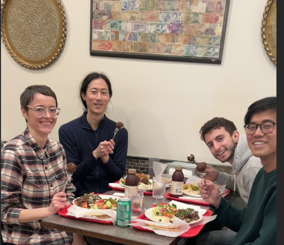

In [20]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((284, 245))

In [21]:
from helper import summarize_predictions_natural_language

In [22]:
text = summarize_predictions_natural_language(pipeline_output)

In [23]:
text

'In this image, there are two bowls two chairs one broccoli four persons three forks four bottles two cups and three dining tables.'

### Generate Audio Narration of an Image

In [25]:
tts_pipe = pipeline("text-to-speech",
                    model="kakao-enterprise/vits-ljs",
                    device=0 if torch.cuda.is_available() else -1) # Use GPU if available, if not, use CPU

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [26]:
narrated_text = tts_pipe(text)

### Play the Generated Audio

In [28]:
from IPython.display import Audio as IPythonAudio

In [29]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

### Try it yourself! 
- Try these models with other images!